**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

**Adding path**

In [52]:
data = pd.read_csv("/kaggle/input/unimployment/Unemployment in India - Unemployment in India.csv")
print(data.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [53]:
data.columns= ["Region","Date","Frequency",
               "Estimated Unemployment Rate(%)",
               "Estimated Employed",
               "Estimated Labour Participation Rate(%)",
               "Area"]

**Unimployment Data**

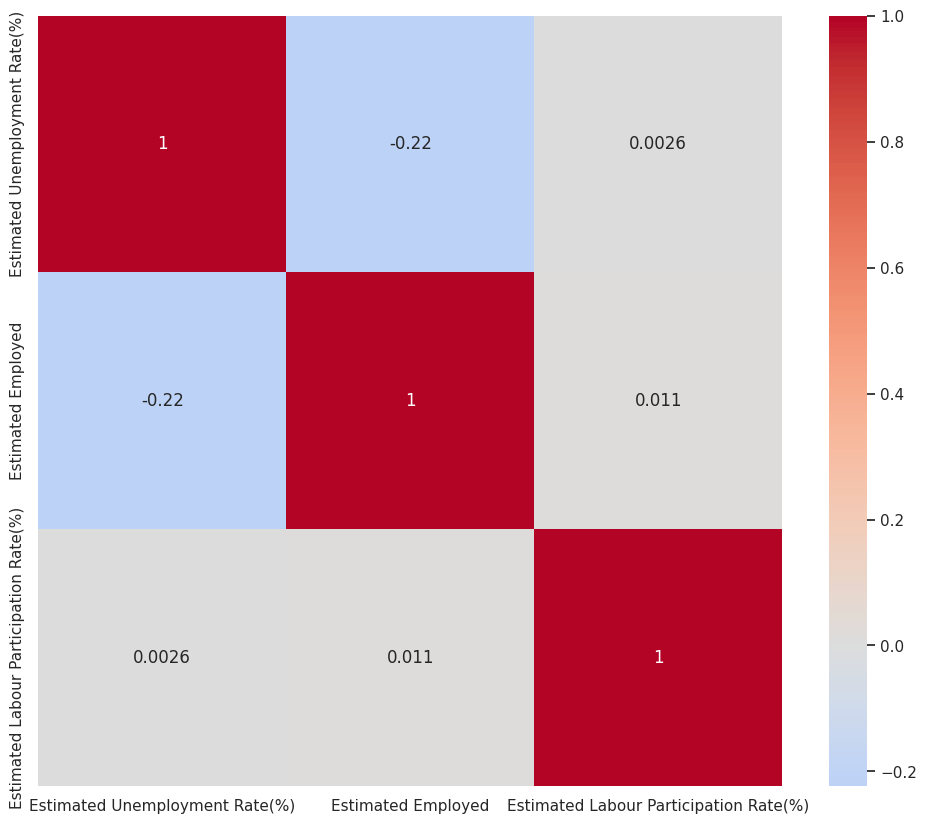

In [54]:
numeric_data = data.select_dtypes(include=['number'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

**Plotting employment in India**

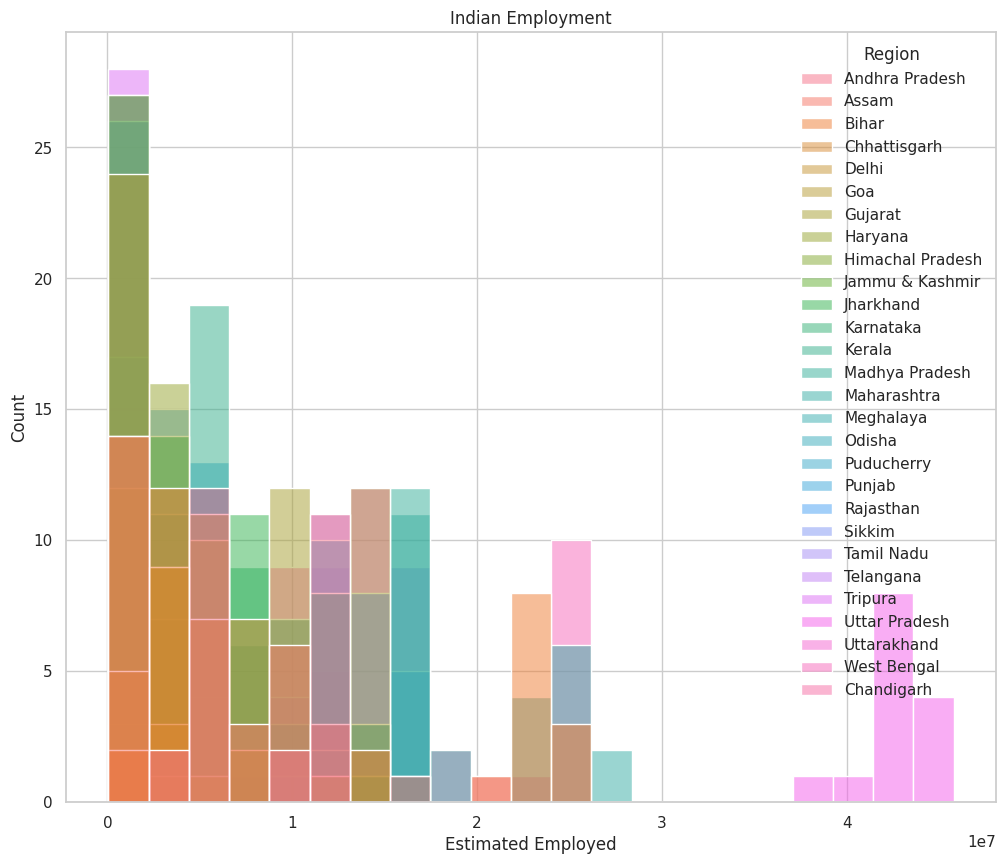

In [55]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    plt.title("Indian Employment")
    sns.histplot(x="Estimated Employed", hue="Region", data=data)
    plt.show()


**Unemployment in India**

In [56]:
print(data.columns)
unemployment = data.groupby(['Region', 'Area']).agg({
    'Estimated Unemployment Rate(%)': 'mean'
}).reset_index()
figure = px.sunburst(unemployment, 
                     path=['Region', 'Area'],  # Hierarchical path
                     values='Estimated Unemployment Rate(%)',
                     color='Estimated Unemployment Rate(%)',
                     color_continuous_scale='RdYlGn',
                     title='Unemployment Rate in India',
                     width=700, height=700)

figure.show()


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate(%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area'],
      dtype='object')


**Estimated Unemployment rate India**

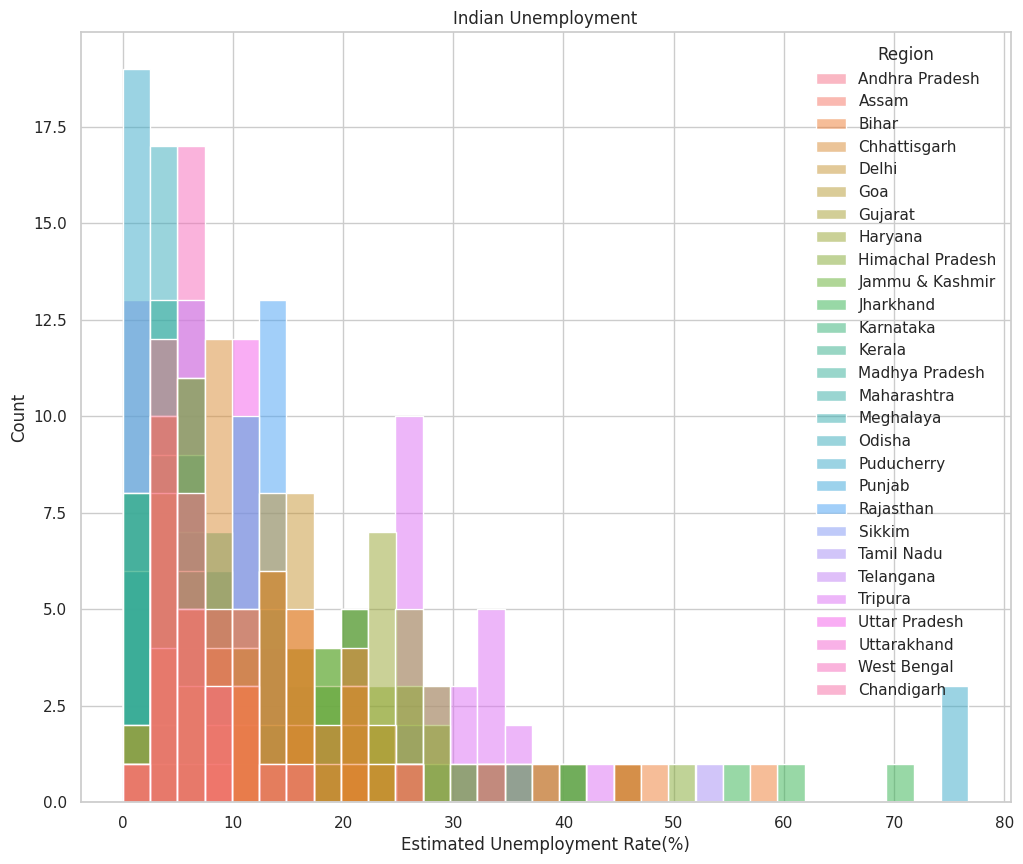

In [57]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    plt.title("Indian Unemployment")
    sns.histplot(x="Estimated Unemployment Rate(%)", hue="Region", data=data)
    plt.show()


In [59]:
data = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South'],
    'Area': ['State A', 'State B', 'State C', 'State D'],
    'Estimated Employed': [1000, 1500, 800, 1200]
})

figure = px.sunburst(data, 
                     path=['Region', 'Area'],
                     values='Estimated Employed',
                     color='Estimated Employed',
                     color_continuous_scale='RdYlGn',
                     title='Employment Distribution in India',
                     width=700, height=700)

figure.show()
